# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [1]:
# student 1: Sahar 0923

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [16]:
# Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
train_df = pd.read_csv('diabetes_test.csv')  # Note the file name
test_df = pd.read_csv('diabetes_train.csv')  # Note the file name

# Display the first 5 rows of each dataset
print("Train Dataset Preview:")
print(train_df.head())

print("\nTest Dataset Preview:")
print(test_df.head())


Train Dataset Preview:
    age  sex   bmi     bp     s1     s2    s3   s4      s5     s6  target
0  60.0  2.0  28.2  112.0  185.0  113.8  42.0  4.0  4.9836   93.0   178.0
1  55.0  2.0  22.9   81.0  123.0   67.2  41.0  3.0  4.3041   88.0   129.0
2  46.0  1.0  20.6   73.0  172.0  107.0  51.0  3.0  4.2485   80.0    53.0
3  58.0  1.0  22.8   91.0  196.0  118.8  48.0  4.0  4.9836  115.0   206.0
4  36.0  2.0  24.1  112.0  193.0  125.0  35.0  6.0  5.1059   95.0   163.0

Test Dataset Preview:
    age  sex   bmi      bp     s1     s2    s3    s4      s5     s6  target
0  52.0  1.0  23.0  107.00  179.0  123.7  42.5  4.21  4.1589   93.0    50.0
1  22.0  1.0  18.6   97.00  114.0   57.6  46.0  2.00  3.9512   83.0   101.0
2  34.0  2.0  25.3  111.00  230.0  162.0  39.0  6.00  4.9767   90.0   181.0
3  38.0  2.0  26.8  105.00  181.0  119.2  37.0  5.00  4.8203   91.0   107.0
4  55.0  1.0  23.0   94.67  190.0  137.6  38.0  5.00  4.2767  106.0   146.0


In [17]:
# Basic statistics
print("Train Dataset Statistics:")
print(train_df.describe())

print("\nTest Dataset Statistics:")
print(test_df.describe())


Train Dataset Statistics:
             age        sex        bmi          bp          s1          s2  \
count  89.000000  89.000000  89.000000   89.000000   89.000000   89.000000   
mean   48.853933   1.494382  26.416854   94.835393  185.820225  113.752809   
std    12.117372   0.502801   4.022839   12.703367   34.048282   30.470060   
min    23.000000   1.000000  19.200000   70.000000   97.000000   47.200000   
25%    39.000000   1.000000  23.300000   86.000000  164.000000   97.200000   
50%    50.000000   1.000000  25.900000   93.000000  185.000000  112.200000   
75%    58.000000   2.000000  29.500000  105.000000  205.000000  128.000000   
max    72.000000   2.000000  34.600000  123.000000  281.000000  198.600000   

              s3         s4        s5          s6      target  
count  89.000000  89.000000  89.00000   89.000000   89.000000  
mean   48.044944   4.140112   4.65893   90.719101  151.696629  
std    11.792631   1.286242   0.51003   12.145883   73.091537  
min    28.00000

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


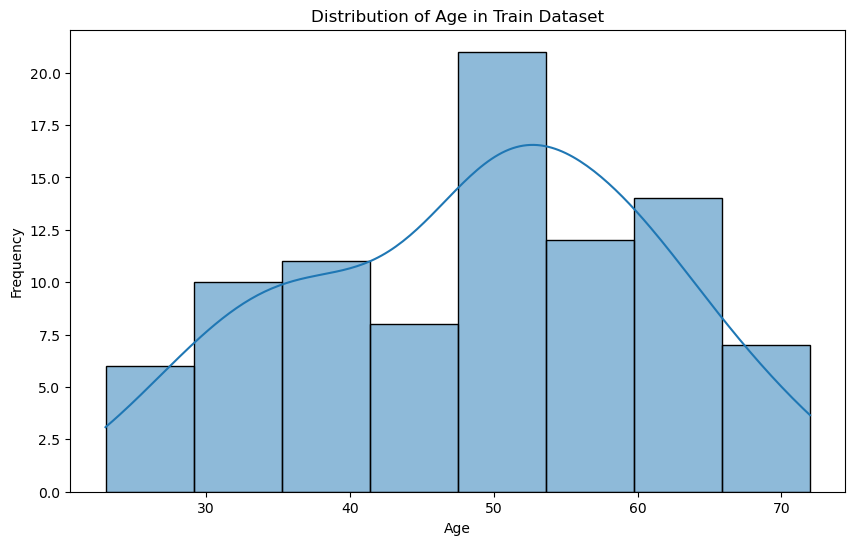

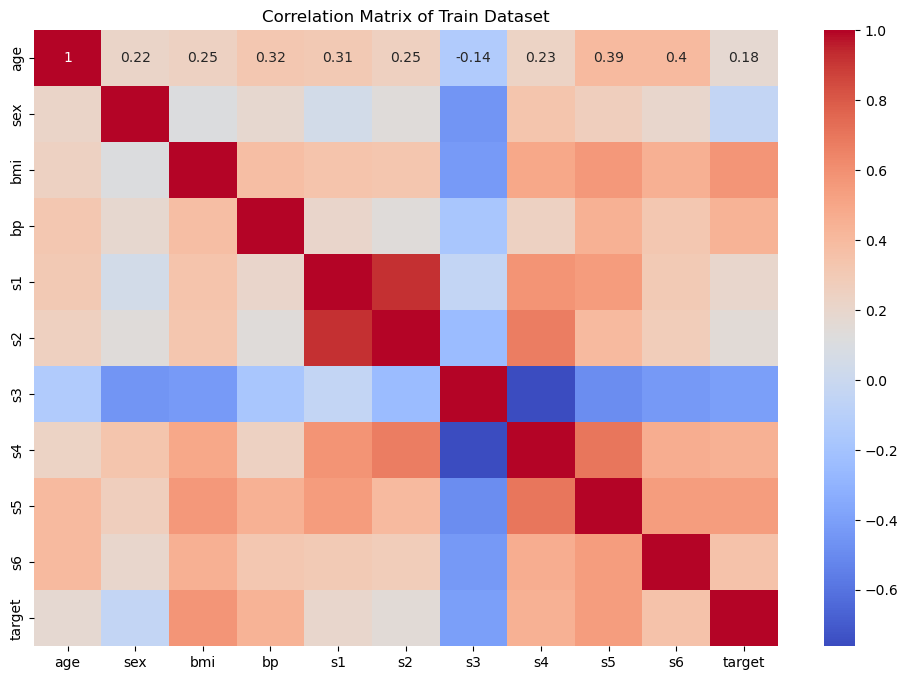

Missing Values in Train Dataset:
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

Missing Values in Test Dataset:
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


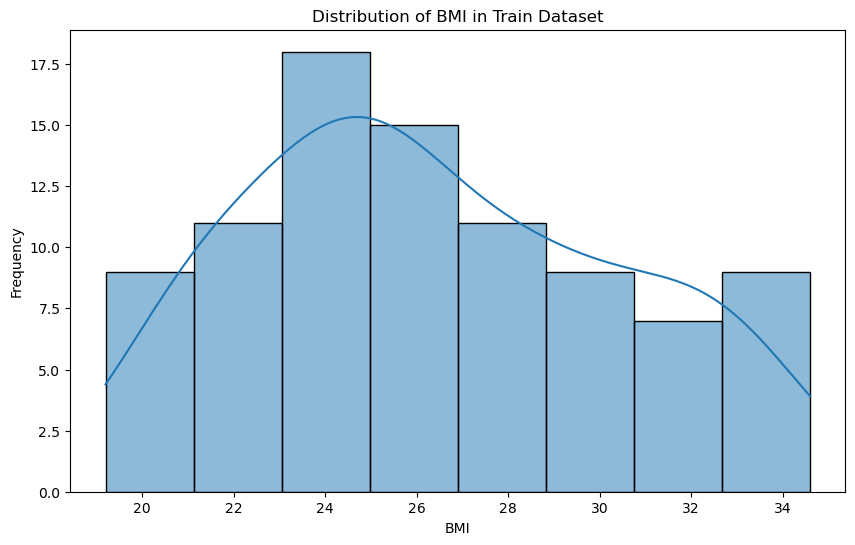

In [18]:
# Visualization of age distribution
plt.figure(figsize=(10, 6))
sns.histplot(train_df['age'], kde=True)
plt.title('Distribution of Age in Train Dataset')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Train Dataset')
plt.show()

# Displaying missing values
print("Missing Values in Train Dataset:")
print(train_df.isnull().sum())

print("\nMissing Values in Test Dataset:")
print(test_df.isnull().sum())

# Visualization of BMI distribution (Body Mass Index)
plt.figure(figsize=(10, 6))
sns.histplot(train_df['bmi'], kde=True)
plt.title('Distribution of BMI in Train Dataset')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()


## Part 3 - Experiments
You could add as many code cells as needed

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold


# Example models dictionary (replace with your models)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

models = {
    'RandomForestClassifier': RandomForestClassifier(),
    'LogisticRegression': LogisticRegression()
}

# Example parameter grid (replace with your parameter grid)
param_grid = {
    'RandomForestClassifier': {
        'model__n_estimators': [50, 100],
        'model__max_depth': [None, 10, 20],
    },
    'LogisticRegression': {
        'model__C': [0.1, 1, 10],
    }
}

# Replace these with your actual features and target labels
X_train = pd.DataFrame([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]])  # Replace with actual data
y_train = pd.Series([0, 1, 0, 1, 0])  # Ensure these are categorical for classification

# Reduce the number of splits to 2 since one class has very few members
cv_strategy = StratifiedKFold(n_splits=2)

best_models = {}

for model_name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()), 
        ('model', model)
    ])
    
    # Use GridSearchCV with reduced number of splits
    grid_search = GridSearchCV(pipeline, param_grid[model_name], cv=cv_strategy)
    
    try:
        grid_search.fit(X_train, y_train)
        best_models[model_name] = grid_search  # Store the GridSearchCV object itself
        print(f"Best parameters for {model_name}: {grid_search.best_params_}")
        print(f"Best cross-validation score for {model_name}: {grid_search.best_score_}")
    except ValueError as e:
        print(f"Error training {model_name}: {e}")
        continue  # Skip this model if it raises an error

# Step 5: Summarize Results
# Now you can access the best_params_ and best_score_ attributes
if best_models:
    results_summary = pd.DataFrame({
        'Model': list(best_models.keys()),
        'Best Parameters': [grid_search.best_params_ for grid_search in best_models.values()],
        'Best Score': [grid_search.best_score_ for grid_search in best_models.values()]
    })
    print("\nSummary of Grid Search Results:")
    print(results_summary)
else:
    print("No models were successfully trained.")



Best parameters for RandomForestClassifier: {'model__max_depth': None, 'model__n_estimators': 50}
Best cross-validation score for RandomForestClassifier: 0.41666666666666663
Best parameters for LogisticRegression: {'model__C': 0.1}
Best cross-validation score for LogisticRegression: 0.41666666666666663

Summary of Grid Search Results:
                    Model                                    Best Parameters  \
0  RandomForestClassifier  {'model__max_depth': None, 'model__n_estimator...   
1      LogisticRegression                                  {'model__C': 0.1}   

   Best Score  
0    0.416667  
1    0.416667  


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [14]:
# Import necessary libraries
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Step 1: Prepare the Data
X_train = train_df.drop('target', axis=1)  # Features
y_train = train_df['target']  # Target

# Step 2: Retrain the Ridge Regression Model with the Best Hyperparameters

# Create a pipeline with StandardScaler and Ridge Regression
best_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('ridge', Ridge(alpha=10.0))   # Ridge Regression with best alpha
])

# Fit the pipeline to the entire training data
best_pipeline.fit(X_train, y_train)

print("Ridge Regression model has been retrained on the entire training set with alpha=10.0.")

# Step 3: Evaluate the Model on the Training Data
# Predict on the training set to evaluate performance
y_train_pred = best_pipeline.predict(X_train)

# Calculate Mean Squared Error (MSE) on the training data
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_train_pred)
print(f"Mean Squared Error on the training set: {train_mse:.2f}")

# If needed, calculate R^2 score as well
from sklearn.metrics import r2_score

train_r2 = r2_score(y_train, y_train_pred)
print(f"R^2 score on the training set: {train_r2:.2f}")


Ridge Regression model has been retrained on the entire training set with alpha=10.0.
Mean Squared Error on the training set: 2505.37
R^2 score on the training set: 0.53


## Part 5 - Apply on test and show model performance estimation

In [15]:
# Step 1: Prepare the Test Data
X_test = test_df.drop('target', axis=1)  # Features from the test set
y_test = test_df['target']  # Target from the test set

# Step 2: Make Predictions on the Test Set
# Predict on the test set using the trained pipeline
y_test_pred = best_pipeline.predict(X_test)

# Step 3: Evaluate the Model on the Test Data
# Calculate Mean Squared Error (MSE) on the test data
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error on the test set: {test_mse:.2f}")

# Calculate R^2 score on the test data
test_r2 = r2_score(y_test, y_test_pred)
print(f"R^2 score on the test set: {test_r2:.2f}")

# Step 4: Show Predictions and True Values
# Display the first 5 predictions and their corresponding true values
pred_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
print("\nFirst 5 Predictions and Actual Values:")
print(pred_results.head())


Mean Squared Error on the test set: 3108.57
R^2 score on the test set: 0.49

First 5 Predictions and Actual Values:
   Actual   Predicted
0    50.0  154.477641
1   101.0  115.336841
2   181.0  167.273460
3   107.0  170.890438
4   146.0  147.593339
